In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
pd.set_option('display.max.columns', None)

# Objective

How to set the risk treshold to give credits and still make profits?

* Give credits to people
* Lower loan risk by identifying patterns from within historical data
* Predict if a persons loan defaults or not / if a person is credit worthy or not)

# Constraints

* no time constraint
* m=C⋅r/n1−(1+r/n)−N 

# Reading and Understanding the Data

In [3]:
df = pd.read_csv("Home_Loan/application_train.csv.tar.gz")
df.shape

(307512, 122)

In [4]:
df.head(10)

,application_train.csv,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,

In [5]:
df.describe().round()

,application_train.csv,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0,307511.0,307511.0,307511.0,307511.0,307499.0,307233.0,307511.0,307511.0,307511.0,307511.0,307511.0,104582.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307509.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,134133.0,306851.0,246546.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,159080.0,306490.0,306490.0,306490.0,306490.0,307510.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0
mean,278181.0,0.0,0.0,168798.0,599026.0,27109.0,538396.0,0.0,-16037.0,63815.0,-4986.0,-2994.0,12.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-963.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
std,102790.0,0.0,1.0,237123.0,402491.0,14494.0,369446.0,0.0,4364.0,141276.0,3523.0,1509.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
min,100002.0,0.0,0.0,25650.0,45000.0,1616.0,40500.0,0.0,-25229.0,-17912.0,-24672.0,-7197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307512 entries, 0 to 307511
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   application_train.csv         307511 non-null  float64
 1   TARGET                        307511 non-null  float64
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  float64
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

<details><summary>
    Click here for the column names and descriptions for the Home_Loan dataset
</summary>
    
 Column name        | Description                                           
--------------------|-------------------------------------------------------
SK_ID_CURR          | ID of loan in our sample                              
TARGET              | Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
NAME_CONTRACT_TYPE  | Identification if loan is cash or revolving - A revolving loan facility is a form of credit issued by a financial institution that provides the borrower with the ability to draw down or withdraw, repay, and withdraw again.
CODE_GENDER         | Gender of the client
FLAG_OWN_CAR        | Flag if the client owns a car
FLAG_OWN_REALTY     | Flag if client owns a house or flat
CNT_CHILDREN        | Number of children the client has
AMT_INCOME_TOTAL    | Income of the client
AMT_CREDIT          | Credit amount of the loan
AMT_ANNUITY         | Loan annuity
AMT_GOODS_PRICE     | For consumer loans it is the price of the goods for which the loan is given
NAME_TYPE_SUITE     | Who was accompanying client when he was applying for the loan
NAME_INCOME_TYPE    | Clients income type (businessman, working, maternity leave,…)
NAME_EDUCATION_TYPE | Level of highest education the client achieved
NAME_FAMILY_STATUS  | Family status of the client
NAME_HOUSING_TYPE   | What is the housing situation of the client (renting, living with parents, ...)
REGION_POPULATION_RELATIVE | Normalized population of region where client lives (higher number means the client lives in more populated region)
DAYS_BIRTH          | Client's age in days at the time of application - time only relative to the application
DAYS_EMPLOYED       | How many days before the application the person started current employment - time only relative to the application
DAYS_REGISTRATION   | How many days before the application did client change his registration - time only relative to the application
DAYS_ID_PUBLISH     | How many days before the application did client change the identity document with which he applied for the loan - time only relative to the application
OWN_CAR_AGE         | Age of client's car
FLAG_MOBIL          | Did client provide mobile phone
FLAG_EMP_PHONE      | Did client provide work phone
FLAG_WORK_PHONE     | Did client provide home phone
FLAG_CONT_MOBILE    | Was mobile phone reachable
FLAG_PHONE          | Did client provide home phone
FLAG_EMAIL          | Did client provide email
OCCUPATION_TYPE     | What kind of occupation does the client have
CNT_FAM_MEMBERS     | How many family members does client have
REGION_RATING_CLIENT | Our rating of the region where client lives (1,2,3)
REGION_RATING_CLIENT_W_CITY | Our rating of the region where client lives with taking city into account (1,2,3)
WEEKDAY_APPR_PROCESS_START | On which day of the week did the client apply for the loan
HOUR_APPR_PROCESS_START | Approximately at what hour did the client apply for the loan - rounded
REG_REGION_NOT_LIVE_REGION | Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
REG_REGION_NOT_WORK_REGION | Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
LIVE_REGION_NOT_WORK_REGION | Flag if client's contact address does not match work address (1=different, 0=same, at region level)
REG_CITY_NOT_LIVE_CITY | Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
REG_CITY_NOT_WORK_CITY | Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
LIVE_CITY_NOT_WORK_CITY | Flag if client's contact address does not match work address (1=different, 0=same, at city level)
ORGANIZATION_TYPE   | Type of organization where client works
EXT_SOURCE_1        | Normalized score from external data source
EXT_SOURCE_2        | Normalized score from external data source
EXT_SOURCE_3        | Normalized score from external data source
APARTMENTS_AVG      | Normalized information about building where the client lives: average apartment size
BASEMENTAREA_AVG    | Normalized information about building where the client lives: average basement size
YEARS_BEGINEXPLUATATION_AVG | Normalized information about building where the client lives: average begin of expluatation
YEARS_BUILD_AVG     | Normalized information about building where the client lives: average age of building
COMMONAREA_AVG      | Normalized information about building where the client lives: average common area
ELEVATORS_AVG       | Normalized information about building where the client lives: average number of elevators
ENTRANCES_AVG       | Normalized information about building where the client lives: average number of entrances
FLOORSMAX_AVG       | Normalized information about building where the client lives: average number of maximum floors
FLOORSMIN_AVG       | Normalized information about building where the client lives: average number of minimum floors
LANDAREA_AVG        | Normalized information about building where the client lives: average land area
LIVINGAPARTMENTS_AVG | Normalized information about building where the client lives: average number of living apartmens
LIVINGAREA_AVG      | Normalized information about building where the client lives: average living area
NONLIVINGAPARTMENTS_AVG | Normalized information about building where the client lives: average number of non-living apartments
NONLIVINGAREA_AVG   | Normalized information about building where the client lives: average non-living area
APARTMENTS_MODE     | Normalized information about building where the client lives: modus of apartment size
BASEMENTAREA_MODE   | Normalized information about building where the client lives: modus of basement size
YEARS_BEGINEXPLUATATION_MODE | Normalized information about building where the client lives: modus of begin of expluatation
YEARS_BUILD_MODE    | Normalized information about building where the client lives: modus of age of building
COMMONAREA_MODE     | Normalized information about building where the client lives: modus of common area
ELEVATORS_MODE      | Normalized information about building where the client lives: modus of number of elevators
ENTRANCES_MODE      | Normalized information about building where the client lives: modus of number of entrances
FLOORSMAX_MODE      | Normalized information about building where the client lives: modus of maximum number of floors
FLOORSMIN_MODE      | Normalized information about building where the client lives: modus of minumum number of floors
LANDAREA_MODE       | Normalized information about building where the client lives: modus of land area
LIVINGAPARTMENTS_MODE | Normalized information about building where the client lives: modus of number of living apartmens
LIVINGAREA_MODE     | Normalized information about building where the client lives: modus of living area
NONLIVINGAPARTMENTS_MODE | Normalized information about building where the client lives: modus of number of non-living apartmens
NONLIVINGAREA_MODE  | Normalized information about building where the client lives: modus of non-living area
APARTMENTS_MEDI     | Normalized information about building where the client lives: median of apartment size
BASEMENTAREA_MEDI   | Normalized information about building where the client lives: median of basement size
YEARS_BEGINEXPLUATATION_MEDI | Normalized information about building where the client lives: median of begin of expluatation
YEARS_BUILD_MEDI    | Normalized information about building where the client lives: median of age of building
COMMONAREA_MEDI     | Normalized information about building where the client lives: median of common area
ELEVATORS_MEDI      | Normalized information about building where the client lives: median of number of elevators
ENTRANCES_MEDI      | Normalized information about building where the client lives: median of number of entrances
FLOORSMAX_MEDI      | Normalized information about building where the client lives: median of maximum number of floors
FLOORSMIN_MEDI      | Normalized information about building where the client lives: median of minimum number of floors
LANDAREA_MEDI       | Normalized information about building where the client lives: median of land area
LIVINGAPARTMENTS_MEDI | Normalized information about building where the client lives: median of number of living apartmens
LIVINGAREA_MEDI     | Normalized information about building where the client lives: median of living area
NONLIVINGAPARTMENTS_MEDI | Normalized information about building where the client lives: median of number of non-living apartmens
NONLIVINGAREA_MEDI  | Normalized information about building where the client lives: median of living area
FONDKAPREMONT_MODE  | Normalized information about building where the client lives: modus of ?
HOUSETYPE_MODE      | Normalized information about building where the client lives: modus of house type
TOTALAREA_MODE      | Normalized information about building where the client lives: modus of total area
WALLSMATERIAL_MODE  | Normalized information about building where the client lives: modus of wall material
EMERGENCYSTATE_MODE | Normalized information about building where the client lives: modus of emergency state
OBS_30_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings with observable 30 days past due default
DEF_30_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings defaulted on 30 days past due
OBS_60_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings with observable 60 days past due default
DEF_60_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings defaulted on 60 days past due
DAYS_LAST_PHONE_CHANGE | How many days before application did client change phone
FLAG_DOCUMENT_2     | Did client provide document 2
FLAG_DOCUMENT_3     | Did client provide document 3
FLAG_DOCUMENT_4     | Did client provide document 4
FLAG_DOCUMENT_5     | Did client provide document 5
FLAG_DOCUMENT_6     | Did client provide document 6
FLAG_DOCUMENT_7     | Did client provide document 7
FLAG_DOCUMENT_8     | Did client provide document 8
FLAG_DOCUMENT_9     | Did client provide document 9
FLAG_DOCUMENT_10    | Did client provide document 10
FLAG_DOCUMENT_11    | Did client provide document 11
FLAG_DOCUMENT_12    | Did client provide document 12
FLAG_DOCUMENT_13    | Did client provide document 13
FLAG_DOCUMENT_14    | Did client provide document 14
FLAG_DOCUMENT_15    | Did client provide document 15
FLAG_DOCUMENT_16    | Did client provide document 16
FLAG_DOCUMENT_17    | Did client provide document 17
FLAG_DOCUMENT_18    | Did client provide document 18
FLAG_DOCUMENT_19    | Did client provide document 19
FLAG_DOCUMENT_20    | Did client provide document 20
FLAG_DOCUMENT_21    | Did client provide document 21
AMT_REQ_CREDIT_BUREAU_HOUR | Number of enquiries to Credit Bureau about the client one hour before application
AMT_REQ_CREDIT_BUREAU_DAY | Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
AMT_REQ_CREDIT_BUREAU_WEEK | Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
AMT_REQ_CREDIT_BUREAU_MON | Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
AMT_REQ_CREDIT_BUREAU_QRT | Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
AMT_REQ_CREDIT_BUREAU_YEAR | Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

In [7]:
# Rename the first column
df.rename(columns = {"application_train.csv":"SK_ID_CURR"}, inplace = True)

# Hypotheses

1. 

# Exploring and Cleaning the Data

In [8]:
# Drop rows where target value is missing
df.dropna(subset=["TARGET"], inplace=True)

# Drop rows where important monetary values are missing
df.dropna(subset=["AMT_INCOME_TOTAL", "AMT_CREDIT",
                  "AMT_ANNUITY", "AMT_GOODS_PRICE"],
          inplace=True)

# Drop outliers
idx = np.all(stats.zscore(df[["AMT_INCOME_TOTAL", "AMT_CREDIT",
                              "AMT_ANNUITY", "AMT_GOODS_PRICE"]]) < 3, axis=1)
df = df[idx]

# Drop outlier from "DAYS_EMPLOYED" that are not caught by zscore
df.drop(index=df[df["DAYS_EMPLOYED"] >= df["DAYS_EMPLOYED"].quantile(0.99)].index, inplace=True)

In [9]:
df_clean = pd.DataFrame()

In [10]:
print(df["TARGET"].value_counts())
df_clean["TARGET"] = df["TARGET"].astype("int").astype("category")

0.0    224263
1.0     21572
Name: TARGET, dtype: int64


In [11]:
print(df["NAME_CONTRACT_TYPE"].value_counts())
df_clean = pd.concat([df_clean, pd.get_dummies(df["NAME_CONTRACT_TYPE"])], 1)

Cash loans         220348
Revolving loans     25487
Name: NAME_CONTRACT_TYPE, dtype: int64


In [12]:
print(df["CODE_GENDER"].value_counts())
df_clean = pd.concat([df_clean, pd.get_dummies(df["CODE_GENDER"])], 1)

F      153591
M       92240
XNA         4
Name: CODE_GENDER, dtype: int64


In [13]:
print(df["FLAG_OWN_CAR"].value_counts())
print(df["FLAG_OWN_REALTY"].value_counts())
df_clean["FLAG_OWN_CAR"] = df["FLAG_OWN_CAR"].replace(["Y", "N"], [1, 0]).astype("int").astype("category")
df_clean["FLAG_OWN_REALTY"] = df["FLAG_OWN_REALTY"].replace(["Y", "N"], [1, 0]).astype("int").astype("category")

N    154791
Y     91044
Name: FLAG_OWN_CAR, dtype: int64
Y    167177
N     78658
Name: FLAG_OWN_REALTY, dtype: int64


0.0     157713
1.0      58345
2.0      25715
3.0       3542
4.0        400
5.0         81
6.0         19
7.0          7
12.0         2
8.0          2
19.0         2
9.0          2
14.0         2
10.0         2
11.0         1
Name: CNT_CHILDREN, dtype: int64


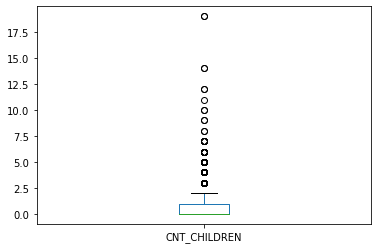

In [14]:
print(df["CNT_CHILDREN"].value_counts())
df["CNT_CHILDREN"].plot(kind="box");

# Initialize a MinMaxScaler, then apply it to the number of children
mm_scaler = MinMaxScaler()
df_clean[["CNT_CHILDREN"]] = mm_scaler.fit_transform(df[["CNT_CHILDREN"]])

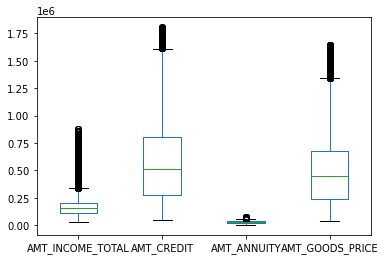

In [15]:
df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].plot(kind="box");

# Initialize a StandardScaler, then apply it to the monetary numbers
std_scaler = StandardScaler()
df_clean[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]] = std_scaler.fit_transform(df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])

In [16]:
print(df["NAME_TYPE_SUITE"].value_counts())
df_clean = pd.concat([df_clean, pd.get_dummies(df[["NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]])], 1)

Unaccompanied      200104
Family              30936
Spouse, partner      9409
Children             2217
Other_B              1438
Other_A               741
Group of people       211
Name: NAME_TYPE_SUITE, dtype: int64


In [17]:
print(type(df["REGION_POPULATION_RELATIVE"][0]))
df_clean["REGION_POPULATION_RELATIVE"] = df["REGION_POPULATION_RELATIVE"]

<class 'numpy.float64'>


<AxesSubplot:>

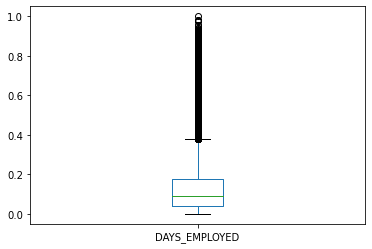

In [18]:
df_clean[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]] = mm_scaler.fit_transform(df[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]] * -1)
df_clean["DAYS_EMPLOYED"].plot(kind="box")

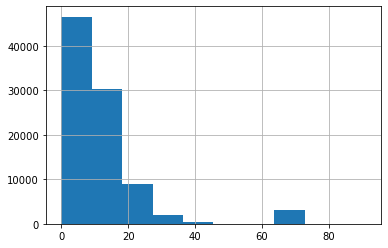

In [19]:
df["OWN_CAR_AGE"].hist(); # to many missing values / two thirds don't own a car

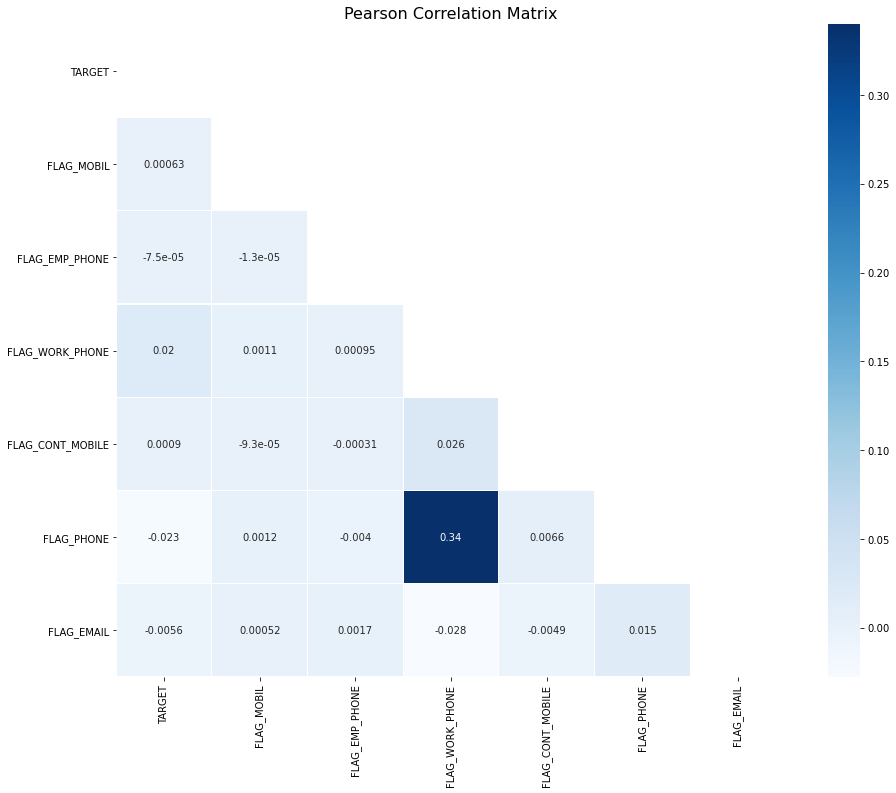

In [20]:
features = ["TARGET", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(15, 12))
plt.title('Pearson Correlation Matrix',fontsize=16)

sns.heatmap(df[features].corr(), linewidths=0.25, cmap="Blues", annot=True, mask=mask);

In [21]:
df["OCCUPATION_TYPE"].value_counts() # Lots of missing values / similar data in NAME_INCOME_TYPE

Laborers                 54422
Sales staff              31595
Core staff               26769
Managers                 19781
Drivers                  18262
High skill tech staff    11072
Accountants               9358
Medicine staff            8389
Security staff            6646
Cooking staff             5898
Cleaning staff            4631
Private service staff     2576
Low-skill Laborers        2086
Waiters/barmen staff      1340
Secretaries               1278
Realty agents              735
HR staff                   538
IT staff                   500
Name: OCCUPATION_TYPE, dtype: int64

In [22]:
df["CNT_FAM_MEMBERS"].value_counts() # similar to "CNT_CHILDREN"

2.0     119798
3.0      50238
1.0      48224
4.0      23745
5.0       3330
6.0        384
7.0         78
8.0         19
9.0          6
10.0         3
20.0         2
12.0         2
14.0         2
13.0         1
15.0         1
16.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [23]:
df_clean[["REGION_RATING_CLIENT_W_CITY"]] = std_scaler.fit_transform(df[["REGION_RATING_CLIENT_W_CITY"]]) # still taking one of the values
df[["TARGET", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY"]].corr() # High correlation between Ratings and low correlation with Target

,TARGET,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
TARGET,1.000000,0.063629,0.065869
REGION_RATING_CLIENT,0.063629,1.000000,0.950484
REGION_RATING_CLIENT_W_CITY,0.065869,0.950484,1.000000


In [24]:
df_clean["REG_REGION_NOT_LIVE_REGION"] = df["REG_REGION_NOT_LIVE_REGION"].astype("int").astype("category")
df_clean["REG_REGION_NOT_WORK_REGION"] = df["REG_REGION_NOT_WORK_REGION"].astype("int").astype("category")
df_clean["LIVE_REGION_NOT_WORK_REGION"] = df["LIVE_REGION_NOT_WORK_REGION"].astype("int").astype("category")
df_clean["REG_CITY_NOT_LIVE_CITY"] = df["REG_CITY_NOT_LIVE_CITY"].astype("int").astype("category")
df_clean["REG_CITY_NOT_WORK_CITY"] = df["REG_CITY_NOT_WORK_CITY"].astype("int").astype("category")

In [31]:
df_clean = pd.concat([df_clean, pd.get_dummies(df[["ORGANIZATION_TYPE"]])], 1)
df["ORGANIZATION_TYPE"].value_counts() # too many values, propably best to take it out

Business Entity Type 3    65987
Self-employed             37664
Other                     16272
Medicine                  10935
Business Entity Type 2    10331
Government                10168
School                     8708
Trade: type 7              7665
Kindergarten               6784
Construction               6511
Business Entity Type 1     5815
Transport: type 4          5263
Trade: type 3              3427
Industry: type 9           3245
Industry: type 3           3242
Security                   3186
Housing                    2901
Industry: type 11          2657
Military                   2516
Agriculture                2424
Bank                       2392
Police                     2227
Transport: type 2          2158
Postal                     2132
Security Ministries        1887
Trade: type 2              1825
Restaurant                 1780
Services                   1526
Industry: type 7           1277
University                 1275
Transport: type 3          1170
Industry

In [35]:
df["WEEKDAY_APPR_PROCESS_START"].value_counts()
df["HOUR_APPR_PROCESS_START"].value_counts() # both seem unnecessary

11.0    29063
10.0    28998
12.0    27215
13.0    25011
14.0    22517
9.0     20761
15.0    20590
16.0    17212
17.0    12887
8.0     11364
18.0     7943
7.0      6989
6.0      4475
19.0     3348
5.0      2856
4.0      1668
20.0     1042
3.0      1001
21.0      352
2.0       255
22.0      137
1.0        76
23.0       38
0.0        37
Name: HOUR_APPR_PROCESS_START, dtype: int64

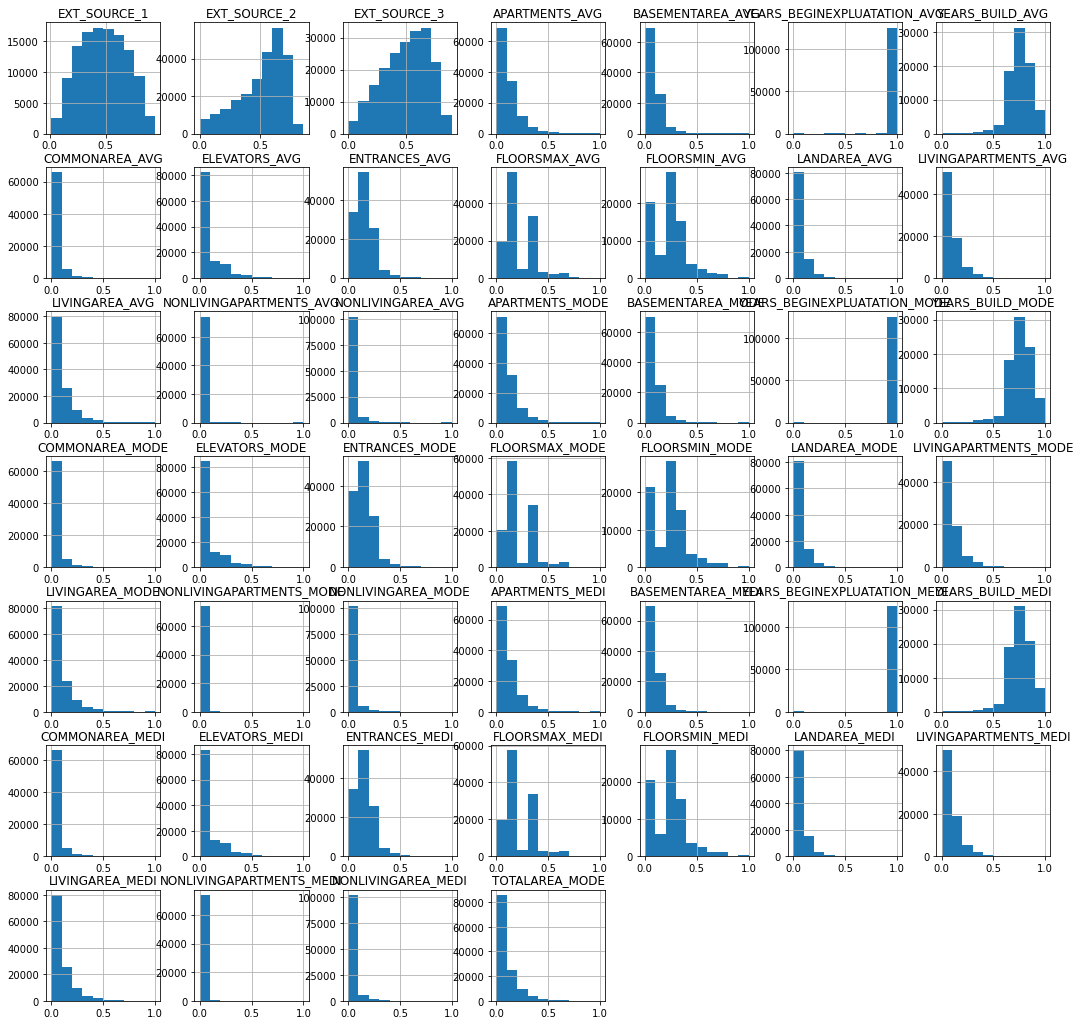

In [39]:
df.loc[:, "EXT_SOURCE_1" : "TOTALAREA_MODE"].hist(figsize=(18, 18));

In [56]:
# Filling all NaNs with mean values
col_names = df.loc[:, "EXT_SOURCE_1" : "NONLIVINGAREA_MEDI"].columns
df_clean[col_names] = df[col_names].fillna(value=df[col_names].mean())
df_clean["TOTALAREA_MODE"] = df["TOTALAREA_MODE"].fillna(value=df["TOTALAREA_MODE"].mean())

In [57]:
df_clean.head()

,TARGET,Cash loans,Revolving loans,F,M,XNA,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE
0,1,1,0,0,1,0,0,1,0.0,0.376026,-0.490811,

In [27]:
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborer

# Cleaning the Data

In [58]:
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

def clean_data(df, test=True):
    global mm_scaler, std_scaler
    
    # Drop rows where target value is missing
    df.dropna(subset=["TARGET"], inplace=True)
    
    # Drop rows where important monetary values are missing
    df.dropna(subset=["AMT_INCOME_TOTAL", "AMT_CREDIT",
                      "AMT_ANNUITY", "AMT_GOODS_PRICE"],
              inplace=True)
    
    # Drop outliers
    if not test:
        idx = np.all(stats.zscore(df[["AMT_INCOME_TOTAL", "AMT_CREDIT",
                                      "AMT_ANNUITY", "AMT_GOODS_PRICE"]]) < 3, axis=1)
        df = df[idx]
    
    # Drop outlier from "DAYS_EMPLOYED" that are not caught by zscore
    df.drop(index=df[df["DAYS_EMPLOYED"] >= df["DAYS_EMPLOYED"].quantile(0.99)].index, inplace=True)
    
    # Create list y with target values
    y = df["TARGET"].astype("int").astype("category")
    
    # Create DataFrame X for all features
    X = pd.DataFrame()
    
    # Copy already correct columns
    X["REGION_POPULATION_RELATIVE"] = df["REGION_POPULATION_RELATIVE"]
    
    # Convert data types
    X["FLAG_OWN_CAR"] = df["FLAG_OWN_CAR"].replace(["Y", "N"], [1, 0]).astype("int").astype("category")
    X["FLAG_OWN_REALTY"] = df["FLAG_OWN_REALTY"].replace(["Y", "N"], [1, 0]).astype("int").astype("category")
    X["REG_REGION_NOT_LIVE_REGION"] = df["REG_REGION_NOT_LIVE_REGION"].astype("int").astype("category")
    X["REG_REGION_NOT_WORK_REGION"] = df["REG_REGION_NOT_WORK_REGION"].astype("int").astype("category")
    X["LIVE_REGION_NOT_WORK_REGION"] = df["LIVE_REGION_NOT_WORK_REGION"].astype("int").astype("category")
    X["REG_CITY_NOT_LIVE_CITY"] = df["REG_CITY_NOT_LIVE_CITY"].astype("int").astype("category")
    X["REG_CITY_NOT_WORK_CITY"] = df["REG_CITY_NOT_WORK_CITY"].astype("int").astype("category")
    
    # Create dummy variables for categorical columns
    X = pd.concat([X, pd.get_dummies(df[["NAME_CONTRACT_TYPE", "CODE_GENDER", "NAME_TYPE_SUITE",
                                         "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                                         "NAME_HOUSING_TYPE", "ORGANIZATION_TYPE"]],
                                     drop_first=True)], 1)
        
    # Use Scaler
    if test:
        X[["CNT_CHILDREN"]] = mm_scaler.transform(df[["CNT_CHILDREN"]])
        X[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_RATING_CLIENT_W_CITY"]] = std_scaler.transform(df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_RATING_CLIENT_W_CITY"]])
        X[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]] = mm_scaler.transform(df[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]] * -1)
    else:
        X[["CNT_CHILDREN"]] = mm_scaler.fit_transform(df[["CNT_CHILDREN"]])
        X[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_RATING_CLIENT_W_CITY"]] = std_scaler.fit_transform(df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_RATING_CLIENT_W_CITY"]])
        X[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]] = mm_scaler.fit_transform(df[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]] * -1)
    
    # Filling all NaNs with mean values
    col_names = df.loc[:, "EXT_SOURCE_1" : "NONLIVINGAREA_MEDI"].columns
    X[col_names] = df[col_names].fillna(value=df[col_names].mean())
    X["TOTALAREA_MODE"] = df["TOTALAREA_MODE"].fillna(value=df["TOTALAREA_MODE"].mean())
    
    return X, y

In [59]:
X, y = clean_data(df, test=False)

/opt/anaconda3/envs/home_loan/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
X.head()

,REGION_POPULATION_RELATIVE,FLAG_OWN_CAR,FLAG_OWN_REALTY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
0,0.018801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.558465,-0.466765,-0.119380,-0.500988,-0.0